In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [2]:
data_folder = "../../data/"

figures_folder = "../../Figures/"

sif_output = "../../sif_files/"

Selecting as resources just Signor

In [3]:
resources = Resources()

In [4]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

Loading the data from Antoine

In [5]:
data = pd.read_csv(data_folder + "discrete_data.csv")

In [6]:
data.fillna("", inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,CSNK2B,DMRTA1,GABRA5,POU2F1,SMARCA4,TGFBR1,CHD7,LHX2,ZIC1
1,LEF1,BCOR,IMPG2,LHX1,,,KDM5A,,ZIC4
2,TP53,SMO,ANPRC,SIX2,,,KDM4C,,
3,PAX3,NHLH1,RARX2,LHX5,,,ZMYM3,,
4,HOXDB13,YAP1,MYC,ZNF35,,,EZH2,,
5,CTNNB1,LDB1,CRX,BARHL1,,,KDM6A,,
6,NKD2,PCNT,LIN28B,MLL3,,,KDM1A,,
7,NKD1,NFATC1,GBRA5,STAT5A,,,KDM3A,,
8,ONECUT2,SOX13,SMAD9,UNCX,,,KDM7A,,
9,EMX2,SUFU,LHX9,MYCN,,,KDM5B,,


Selecting just WNT group

In [8]:
wnt_list = set()

for column in data.columns:
    if "WNT" in column: 
        wnt_list = wnt_list.union(set(data[column].replace({"":None}).dropna()))   

print(wnt_list)

{'ONECUT2', 'HOXDB', 'HOXDB13', 'SMARCA4', 'LET7', 'ZIC4', 'NKD2', 'TP53', 'DMRT2', 'TENA', 'ZIC1', 'DDX3X', 'CSNK2B', 'LHX2', 'MSX2', 'PAX3', 'EMX2', 'CTNNB1', 'MAF', 'RUNX2', 'NKD1', 'LEF1'}


# Creating a Network starting from All Omnipath interactions

In [16]:
wnt_net = Network(wnt_list, resources = resources.interactions)

Error: node ONECUT2 is not present in the resources database
Error: node HOXDB is not present in the resources database
Error: node HOXDB13 is not present in the resources database
Error: node LET7 is not present in the resources database
Error: node ZIC4 is not present in the resources database
Error: node DMRT2 is not present in the resources database
Error: node TENA is not present in the resources database


Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [17]:
wnt_net.add_node("HOXD13")

In [18]:
wnt_net.add_node("HOXD9")

In [19]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,SMARCA4,P51532,NaN
1,NKD2,Q969F2,NaN
2,TP53,P04637,NaN
3,ZIC1,Q15915,NaN
4,DDX3X,O00571,NaN
5,CSNK2B,P67870,NaN
6,LHX2,P50458,NaN
7,MSX2,P35548,NaN
8,PAX3,P23760,NaN
9,EMX2,Q04743,NaN


In [20]:
%%time
wnt_net.complete_connection(maxlen=4, algorithm="dfs", only_signed=True, connect_with_bias=False, consensus=False)

CPU times: user 23.6 s, sys: 6 ms, total: 23.6 s
Wall time: 23.6 s


In [21]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,SMARCA4,P51532,NaN
1,NKD2,Q969F2,NaN
2,TP53,P04637,NaN
3,ZIC1,Q15915,NaN
4,DDX3X,O00571,NaN
...,...,...,...
90,SCRIB,Q14160,NaN
91,SIGNOR-PF1,SIGNOR-PF1,NaN
92,CCN4,O95388,NaN
93,BMP2,P12643,NaN


In [22]:
wnt_net.edges

,source,target,Type,Effect,References
0,P51532,SIGNOR-C92,None,form complex,15627498; 15627498
1,SIGNOR-C92,P04637,None,stimulation,11950834; 11950834
2,P04637,SIGNOR-C6,None,stimulation,10207072; 10207072
3,SIGNOR-C6,P15172,None,stimulation,10944526; 10944526
4,P15172,P51532,None,stimulation,17194702; 17194702
...,...,...,...,...,...
340,SIGNOR-PF1,P49715,None,stimulation,12270934
341,P49840,P31749,None,inhibition,23142783
342,P31749,P46937,None,inhibition,12535517
343,P49840,SIGNOR-PF24,None,inhibition,23142783


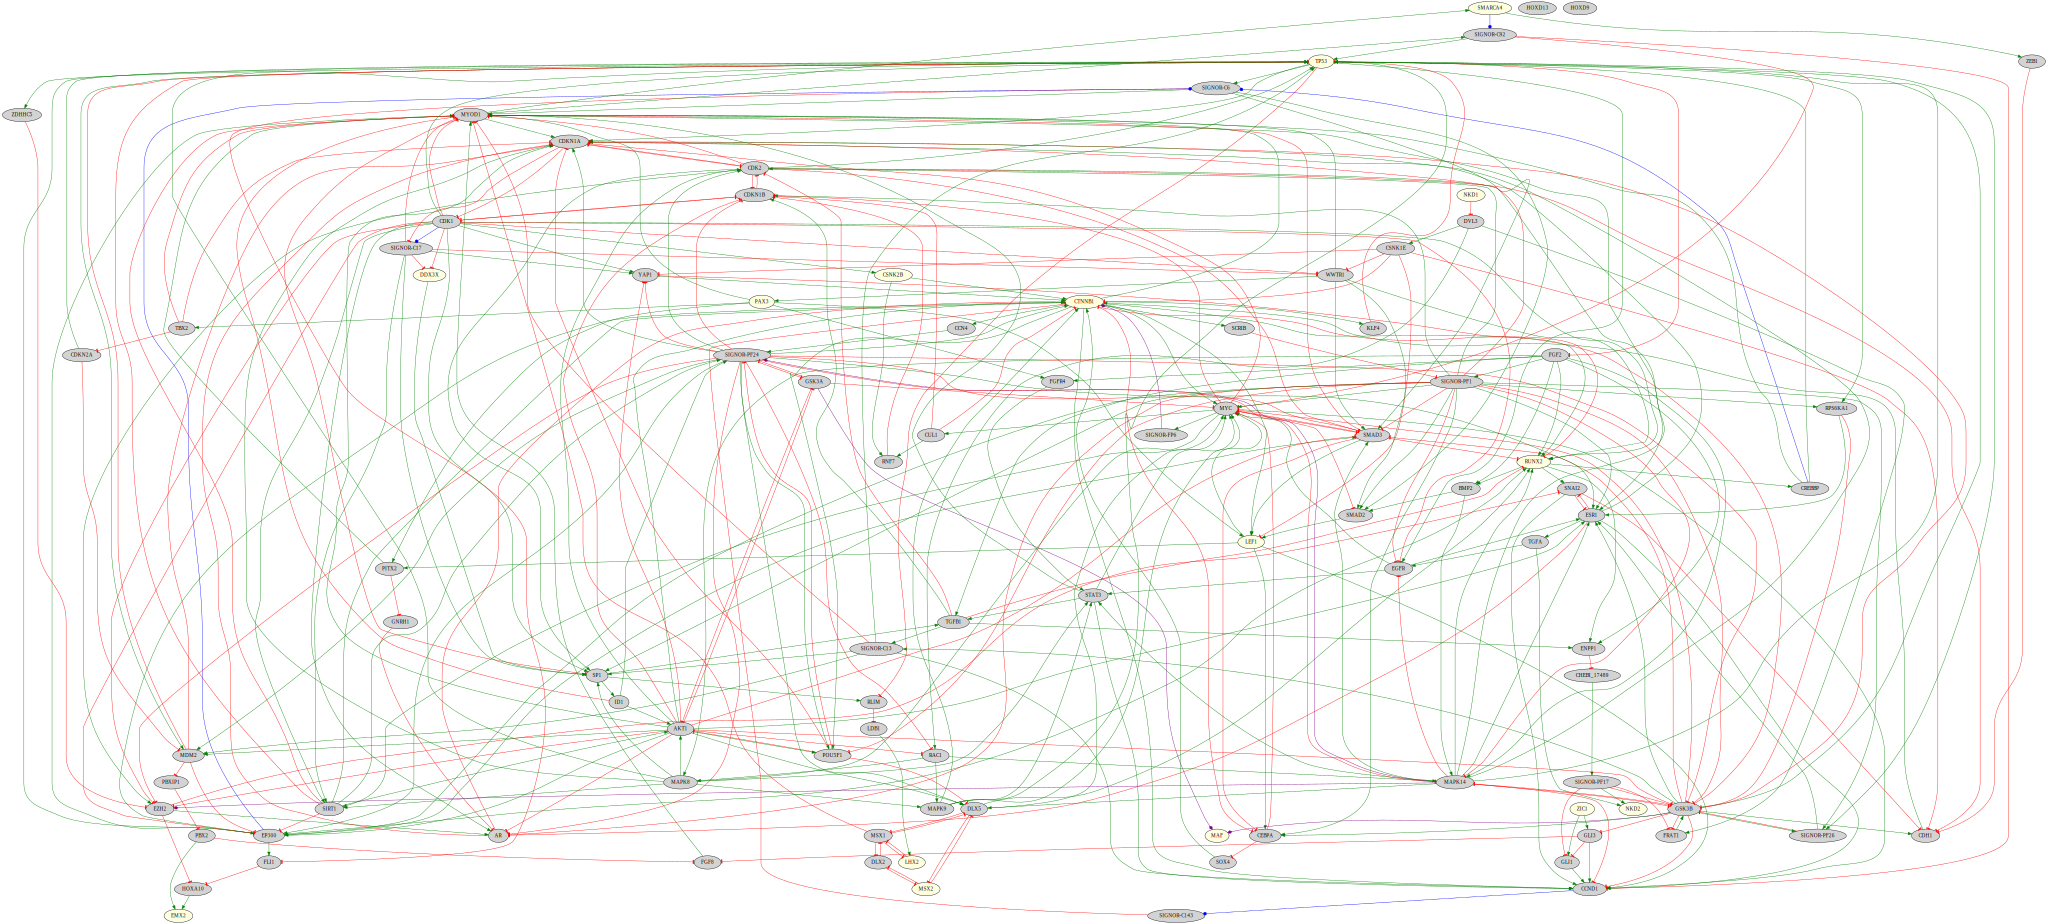

In [23]:
wnt_visualizer = NetworkVisualizer(wnt_net,color_by='effect', noi=True)
output = figures_folder + "WNT_signor"
wnt_visualizer.render(output_file=output)

# Exporting Network in sif file

In order to export a fully connected network in sif file, I remove the nodes that are not connected

In [27]:
from neko._outputs.exports import Exports

In [28]:
wnt_net.remove_node("HOXD13")

In [29]:
wnt_net.remove_node("HOXD9")

In [30]:
export = Exports(wnt_net)

In [31]:
export.export_sif(sif_output + "WNT_signor.sif")